# Setup Path dan Impor Modul

In [1]:
import sys
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Menambahkan path ke direktori utama agar bisa mengimpor modul noventis
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Impor kelas yang akan digunakan
from noventis.data_cleaner import NoventisOutlierHandler
print('Successfully imported modules!')

Successfully imported modules!


# Memuat Dataset

In [2]:
try:
    df_diamonds = pd.read_csv('../dataset_for_examples/diamonds.csv')
    print("Dataset Diamonds berhasil dimuat.")
except FileNotFoundError:
    print("Error: Pastikan file 'diamonds.csv' dari dataset Ames Housing ada di direktori yang sama dengan notebook Anda.")

Dataset Diamonds berhasil dimuat.


# Visualisasi Outlier Sebelum Penanganan

Bentuk data awal: (53940, 11)

Statistik Deskriptif Awal:


,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,5.731157,5.734526,3.538734
std,3989.439738,1.121761,1.142135,0.705699
min,326.000000,0.000000,0.000000,0.000000
25%,950.000000,4.710000,4.720000,2.910000
50%,2401.000000,5.700000,5.710000,3.530000
75%,5324.250000,6.540000,6.540000,4.040000
max,18823.000000,10.740000,58.900000,31.800000


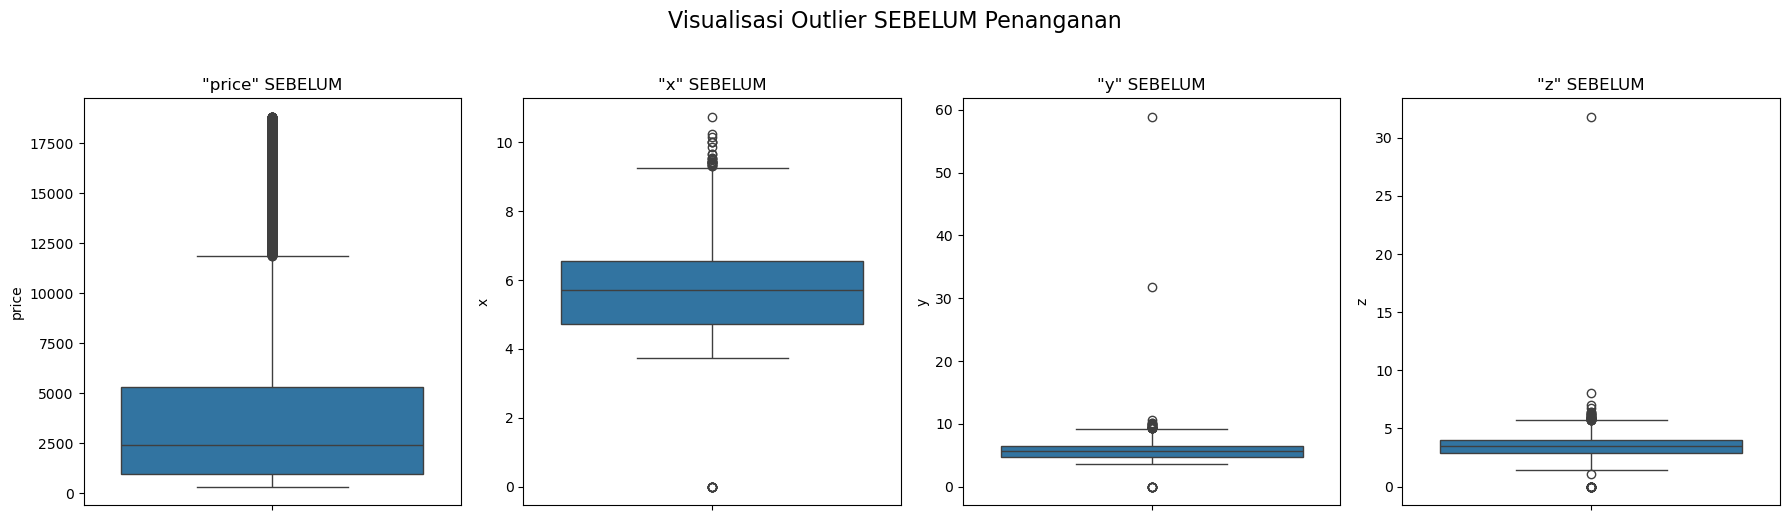

In [3]:
cols_to_check = ['price', 'x', 'y', 'z']
print(f"Bentuk data awal: {df_diamonds.shape}")
print("\nStatistik Deskriptif Awal:")
display(df_diamonds[cols_to_check].describe())

# Visualisasi SEBELUM
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i + 1)
    sb.boxplot(y=df_diamonds[col])
    plt.title(f'"{col}" SEBELUM')
plt.suptitle('Visualisasi Outlier SEBELUM Penanganan', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

# Contoh 1 - Menggunakan Mode Otomatis

--- Menjalankan Outlier Handler dengan Mode Otomatis ---

📋======================= OUTLIER HANDLING SUMMARY =======================📋
Method                    | AUTO
Total Rows Removed        | 16030
Data Retained Score       | 70.28%

📊 Laporan Kualitas Detail (dari .get_quality_report()):
{'column_details': {'Unnamed: 0': {'method': 'QUANTILE_TRIM',
                                   'reason': 'Default fallback'},
                    'carat': {'method': 'WINSORIZE',
                              'reason': 'High skewness (1.12)'},
                    'depth': {'method': 'QUANTILE_TRIM',
                              'reason': 'Default fallback'},
                    'price': {'method': 'WINSORIZE',
                              'reason': 'High skewness (1.62)'},
                    'table': {'method': 'QUANTILE_TRIM',
                              'reason': 'Default fallback'},
                    'x': {'method': 'QUANTILE_TRIM',
                          'reason': 'Default fallback'}

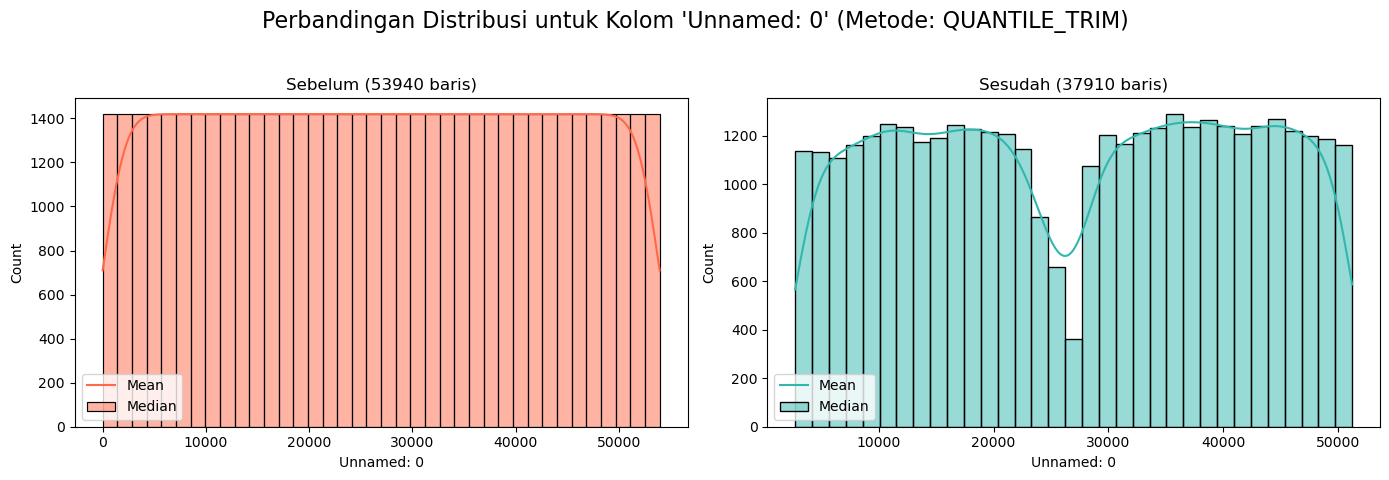

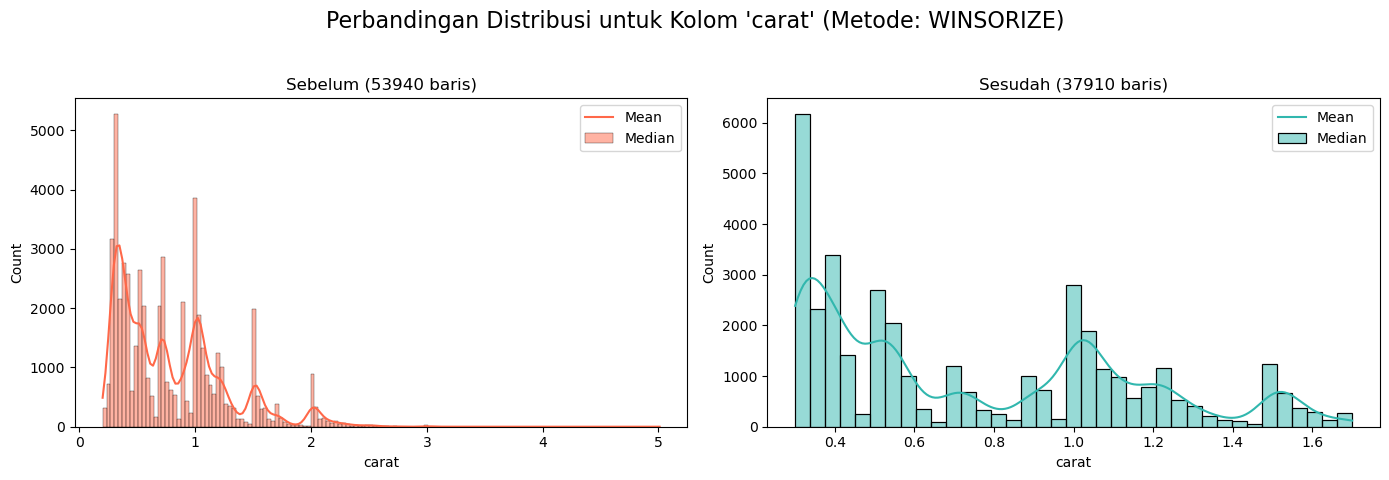

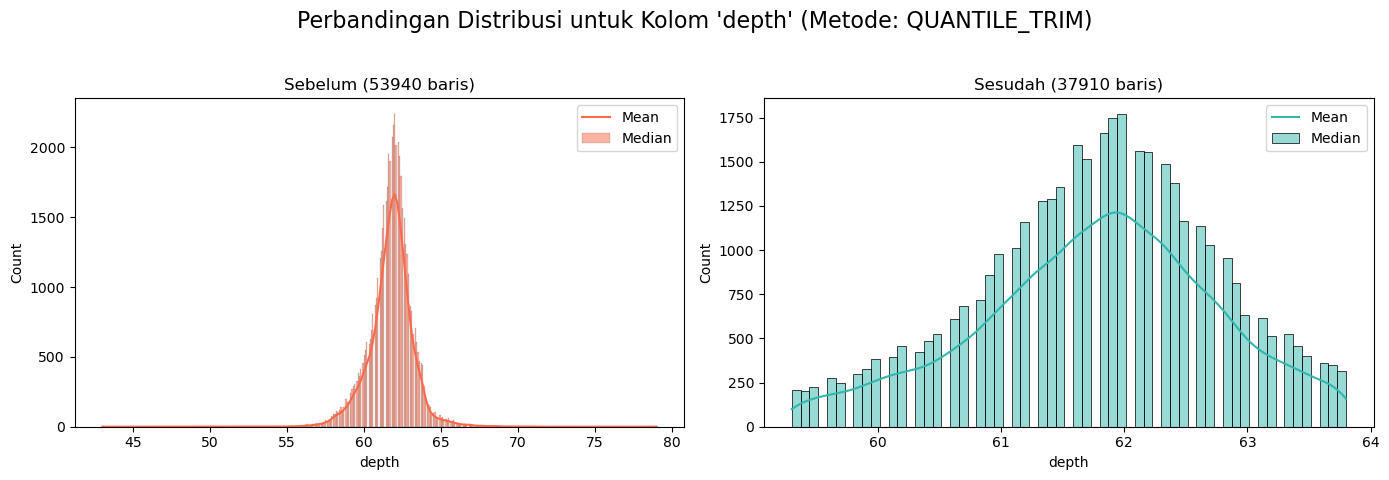

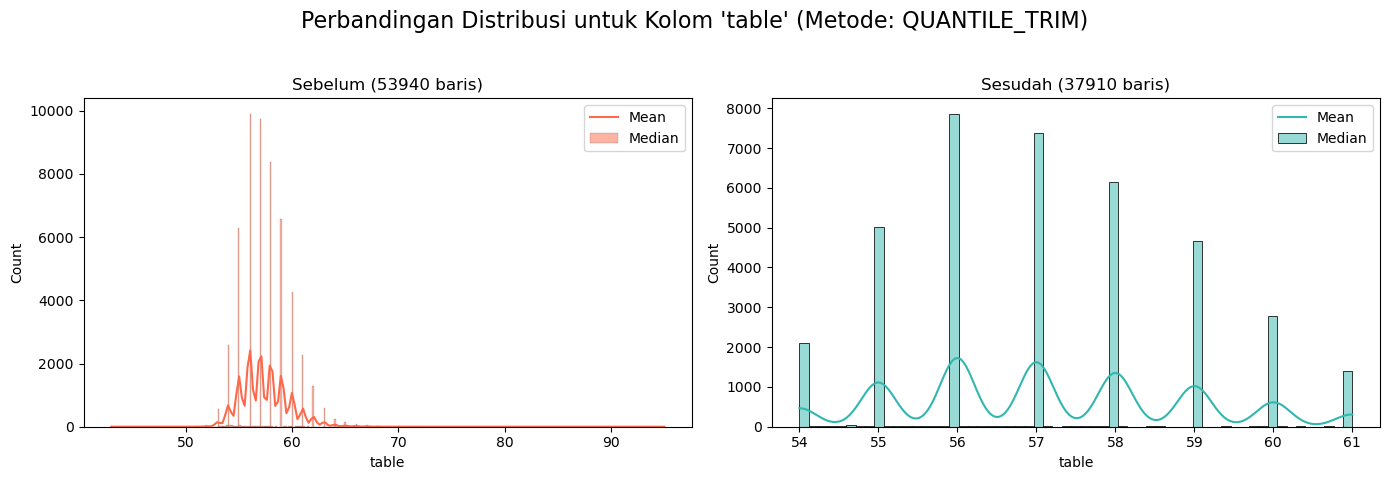

In [4]:
# --- Sel 6 (Diedit): Contoh 1 - Menggunakan Mode Otomatis ---
from pprint import pprint

print("--- Menjalankan Outlier Handler dengan Mode Otomatis ---")

# 1. Inisialisasi handler dengan verbose=True agar ringkasan tercetak
handler_auto = NoventisOutlierHandler(default_method='auto', verbose=True)

# 2. Fit dan transform data
df_diamonds_copy = df_diamonds.copy()
df_handled_auto = handler_auto.fit_transform(df_diamonds_copy)

# --- 3. Tampilkan Laporan Kualitas Detail ---
print("\n📊 Laporan Kualitas Detail (dari .get_quality_report()):")
report_auto = handler_auto.get_quality_report()
pprint(report_auto)

# --- 4. Tampilkan Perbandingan Visual OTOMATIS ---
# Ini menggantikan semua kode plot manual "SETELAH" Anda
print("\n📈 Perbandingan Visual Sebelum vs. Sesudah (Otomatis):")
handler_auto.plot_comparison(max_cols=4)

# Contoh 2 - Metode Manual 'Winsorize'


--- Menjalankan Outlier Handler dengan Metode 'Winsorize' ---

📊 Laporan Kualitas (Winsorize 1%-99%):
{'column_details': {'Unnamed: 0': {'method': 'WINSORIZE',
                                   'reason': 'Forced by user'},
                    'carat': {'method': 'WINSORIZE',
                              'reason': 'Forced by user'},
                    'depth': {'method': 'WINSORIZE',
                              'reason': 'Forced by user'},
                    'price': {'method': 'WINSORIZE',
                              'reason': 'Forced by user'},
                    'table': {'method': 'WINSORIZE',
                              'reason': 'Forced by user'},
                    'x': {'method': 'WINSORIZE', 'reason': 'Forced by user'},
                    'y': {'method': 'WINSORIZE', 'reason': 'Forced by user'},
                    'z': {'method': 'WINSORIZE', 'reason': 'Forced by user'}},
 'overall_summary': {'data_retained_score': '100.00%',
                     'outliers_remove

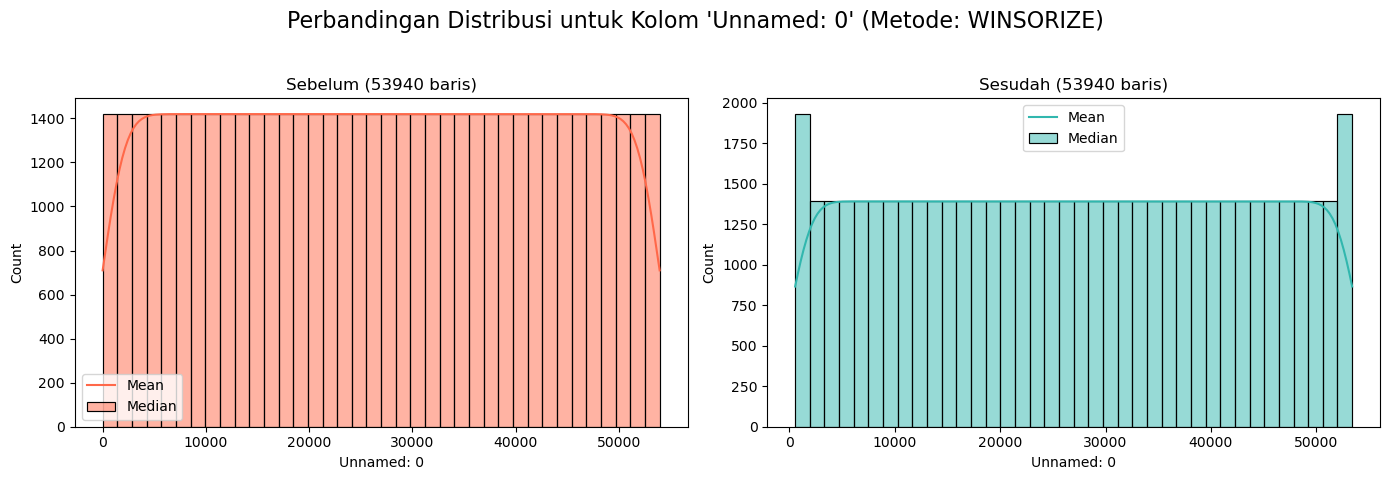

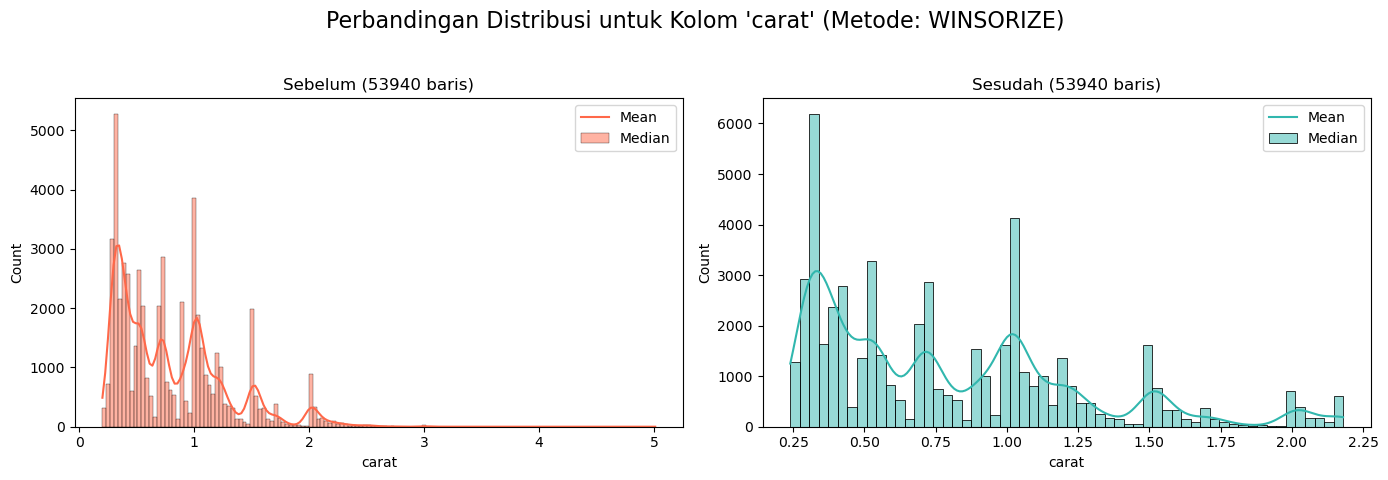

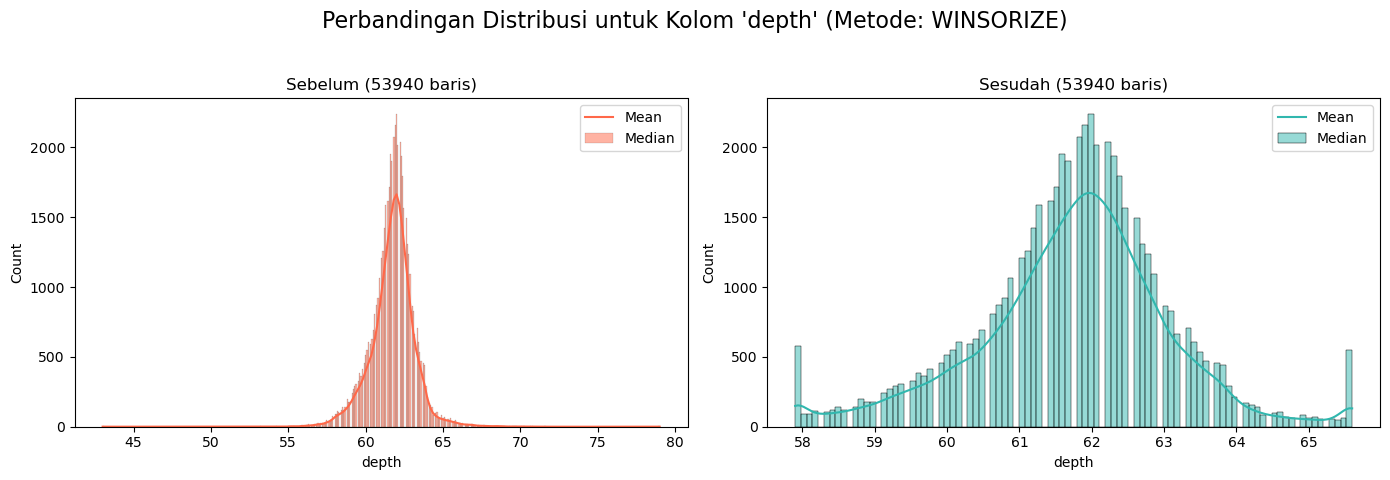

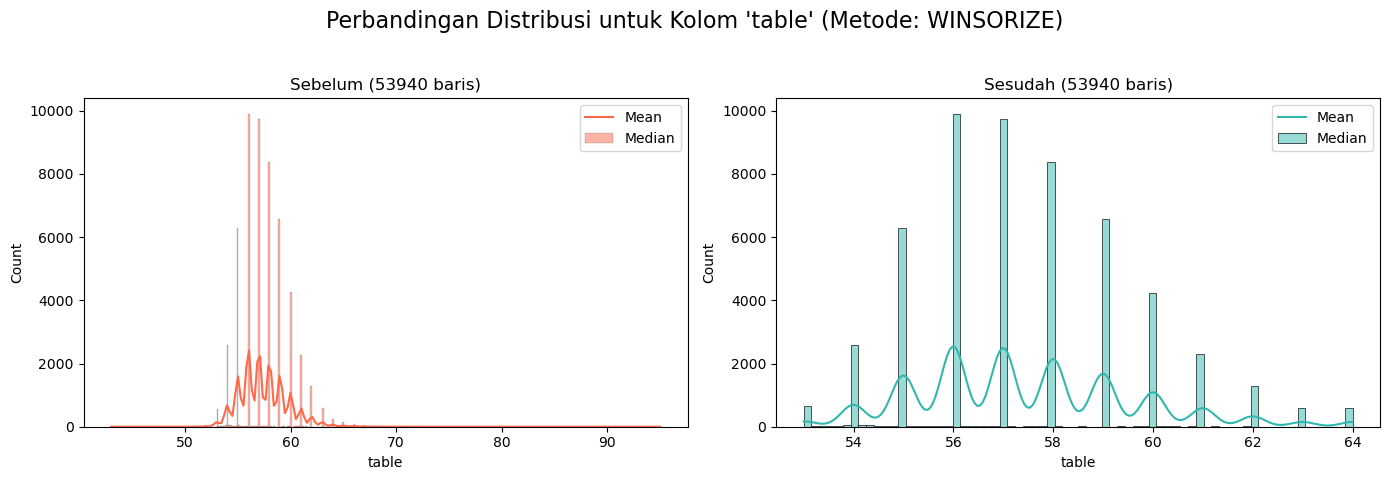

In [5]:
# --- Sel 7 (Diedit): Contoh 2 - Metode Manual 'Winsorize' ---
print("\n--- Menjalankan Outlier Handler dengan Metode 'Winsorize' ---")

# 1. Inisialisasi handler, paksa gunakan 'winsorize' dengan rentang 1% - 99%
handler_winsorize = NoventisOutlierHandler(
    default_method='winsorize', 
    quantile_range=(0.01, 0.99),
    verbose=False  # Kita matikan ringkasan otomatis agar tidak terlalu ramai
)

# 2. Fit dan transform
df_handled_winsorize = handler_winsorize.fit_transform(df_diamonds.copy())

# 3. Tampilkan Laporan Kualitas
print("\n📊 Laporan Kualitas (Winsorize 1%-99%):")
# Karena winsorize tidak menghapus baris, laporannya akan menunjukkan 0 outliers_removed
pprint(handler_winsorize.get_quality_report())

# 4. Tampilkan Visual
print("\n📈 Perbandingan Visual (Winsorize 1%-99%):")
handler_winsorize.plot_comparison(max_cols=4)

# Contoh 3 - Menggunakan Metode Berbeda per Kolom


--- Menjalankan Handler dengan Peta Metode Spesifik (feature_method_map) ---

📋======================= OUTLIER HANDLING SUMMARY =======================📋
Method                    | AUTO
Total Rows Removed        | 11798
Data Retained Score       | 78.13%

📊 Laporan Kualitas Detail (Metode Campuran):
{'column_details': {'Unnamed: 0': {'method': 'QUANTILE_TRIM',
                                   'reason': 'Default fallback'},
                    'carat': {'method': 'WINSORIZE',
                              'reason': 'High skewness (1.12)'},
                    'depth': {'method': 'QUANTILE_TRIM',
                              'reason': 'Default fallback'},
                    'price': {'method': 'WINSORIZE',
                              'reason': 'Forced by user'},
                    'table': {'method': 'QUANTILE_TRIM',
                              'reason': 'Default fallback'},
                    'x': {'method': 'IQR_TRIM', 'reason': 'Forced by user'},
                    'y': {'

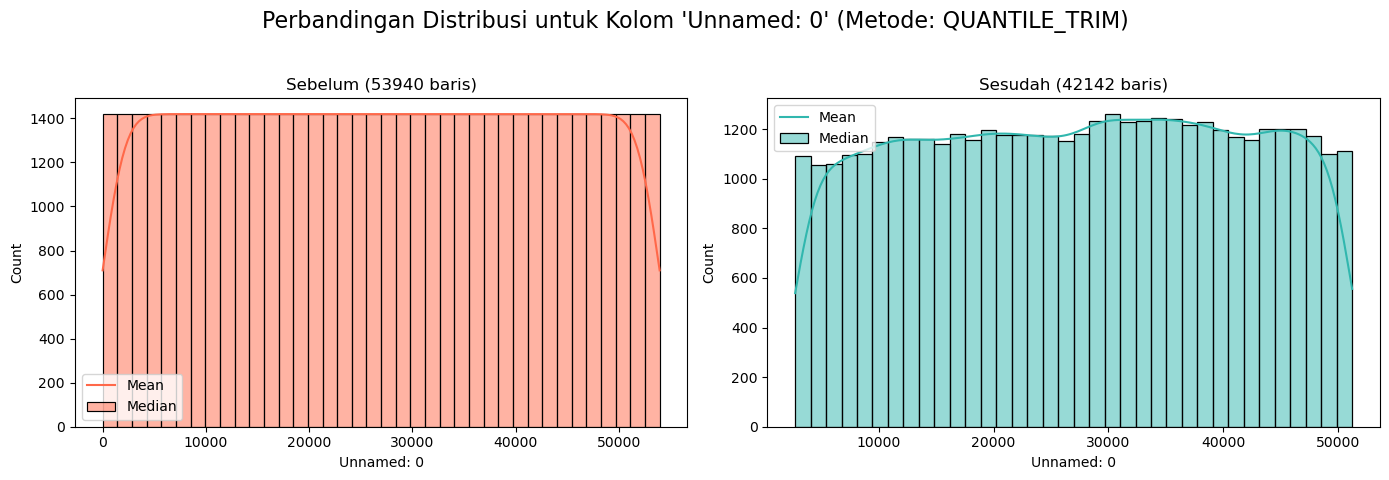

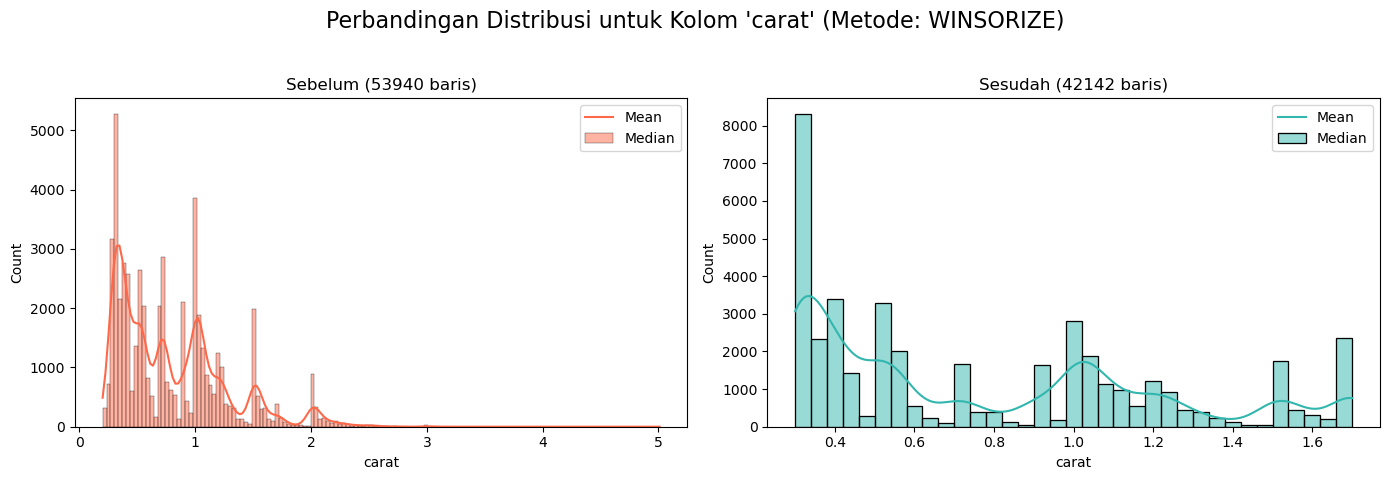

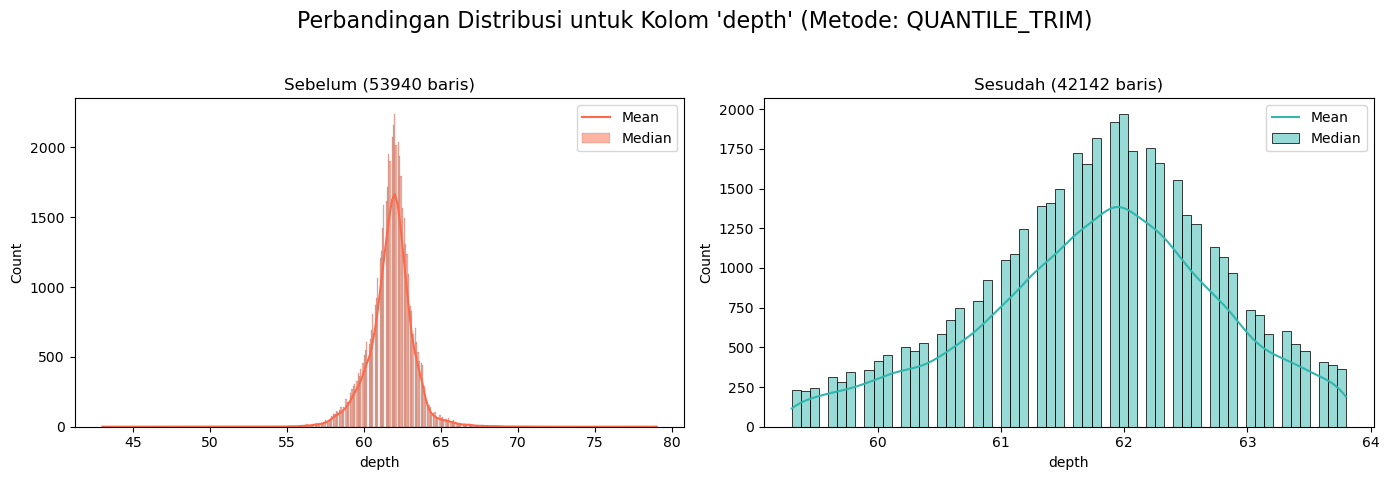

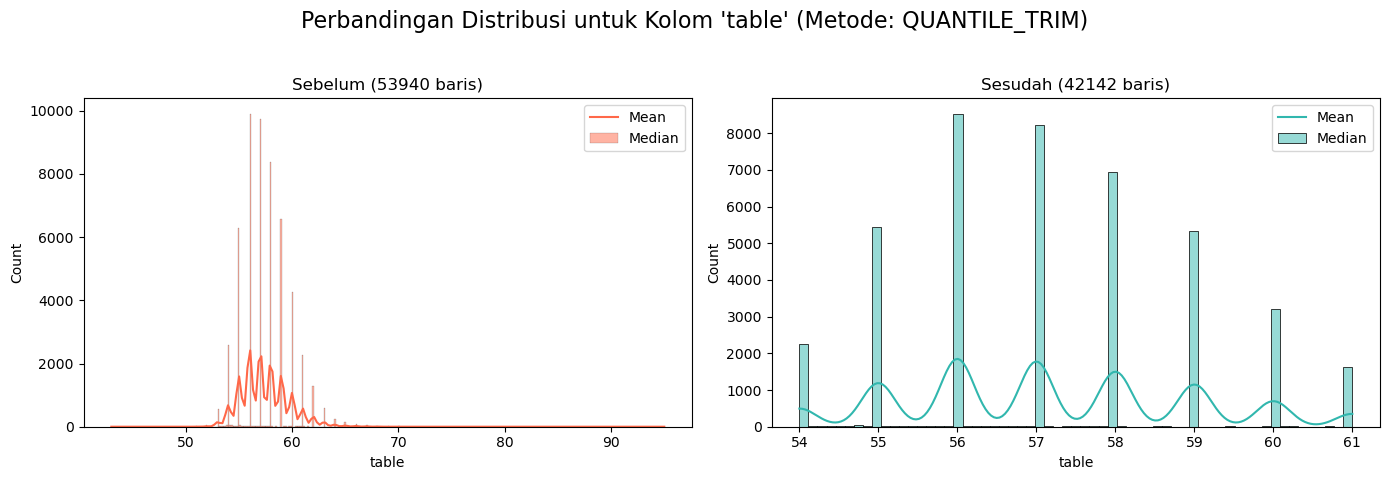

In [6]:
# --- Sel 8 (BARU): Contoh 3 - Peta Metode Spesifik ---
print("\n--- Menjalankan Handler dengan Peta Metode Spesifik (feature_method_map) ---")

# Skenario: 
# - Kolom 'price' yang sangat penting, kita tidak ingin kehilangan data, jadi kita 'winsorize'.
# - Kolom dimensi 'x', 'y', dan 'z' yang memiliki outlier ekstrem, kita buang barisnya dengan 'iqr_trim'.
method_map = {
    'price': 'winsorize',
    'x': 'iqr_trim',
    'y': 'iqr_trim',
    'z': 'iqr_trim'
}

# 1. Inisialisasi handler dengan peta metode
handler_mapped = NoventisOutlierHandler(
    feature_method_map=method_map,
    verbose=True # Nyalakan ringkasan otomatis
)

# 2. Fit dan transform
df_handled_mapped = handler_mapped.fit_transform(df_diamonds.copy())

# 3. Tampilkan Laporan Detail
print("\n📊 Laporan Kualitas Detail (Metode Campuran):")
pprint(handler_mapped.get_quality_report())

# 4. Tampilkan Visual
print("\n📈 Perbandingan Visual (Metode Campuran):")
handler_mapped.plot_comparison(max_cols=4)